# 2차 프로그래밍 과제 문제
* 제출날짜: 2024-05-14까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'


weather = pd.read_csv("weather.csv")

print(weather.head(3))
print()
print(weather.tail(3))

           일시  평균 기온  최대 풍속  평균 풍속
0  2010-08-01   28.7    8.3    3.4
1  2010-08-02   25.2    8.7    3.8
2  2010-08-03   22.1    6.3    2.9

              일시  평균 기온  최대 풍속  평균 풍속
3650  2020-07-29   21.6    3.2    1.0
3651  2020-07-30   22.9    9.7    2.4
3652  2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오

In [46]:
print(weather.loc[weather['일시'] == '2015-06-06'])

              일시  평균 기온  최대 풍속  평균 풍속
1770  2015-06-06   16.6    4.4    1.9


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [47]:
hottest_date=weather.loc[weather['평균 기온'].idxmax(),'일시']
weather.loc[weather['일시']==hottest_date]

,일시,평균 기온,최대 풍속,평균 풍속
1103,2013-08-08,31.3,7.8,4.6


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [48]:
hot_days = weather.loc[weather['평균 기온']>30]
print(hot_days)

              일시  평균 기온  최대 풍속  평균 풍속
1103  2013-08-08   31.3    7.8    4.6
1104  2013-08-09   30.6    9.9    6.4
1105  2013-08-10   30.6    7.4    3.8
2913  2018-07-23   30.5    6.5    1.6
2925  2018-08-04   30.3    5.8    3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

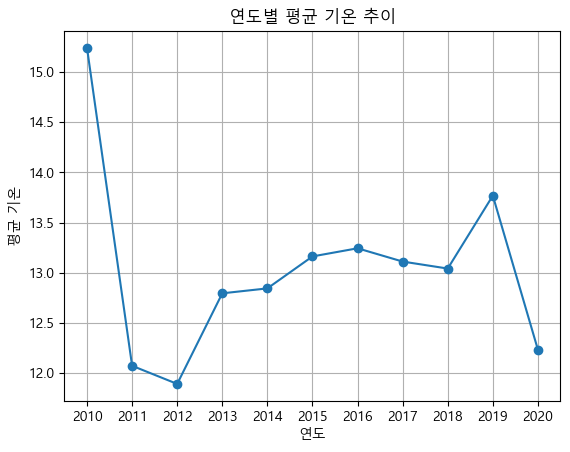

In [49]:
weather['일시'] = pd.to_datetime(weather['일시'])
weather['연도'] = weather['일시'].dt.year
temp_year = weather.groupby('연도')['평균 기온'].mean()

# 선 그래프 그리기
# plt.figure(figsize=(10, 6))
plt.plot(temp_year.index, temp_year.values, marker='o', linestyle='-')
plt.title('연도별 평균 기온 추이')
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.grid(True)
plt.xticks(temp_year.index)  # x축 눈금을 연도로 설정
plt.show()

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오

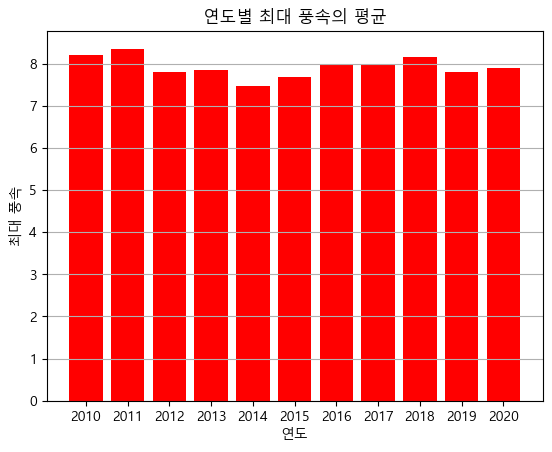

In [50]:
weather['일시']=pd.to_datetime(weather['일시'])
weather['연도']=weather['일시'].dt.year
mean_max_windspeed = weather.groupby('연도')['최대 풍속'].mean()

plt.bar(mean_max_windspeed.index,mean_max_windspeed.values,color='red')
plt.title('연도별 최대 풍속의 평균')
plt.xlabel('연도')
plt.ylabel('최대 풍속')
plt.xticks(mean_max_windspeed.index)
plt.grid(axis='y')
plt.show()

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


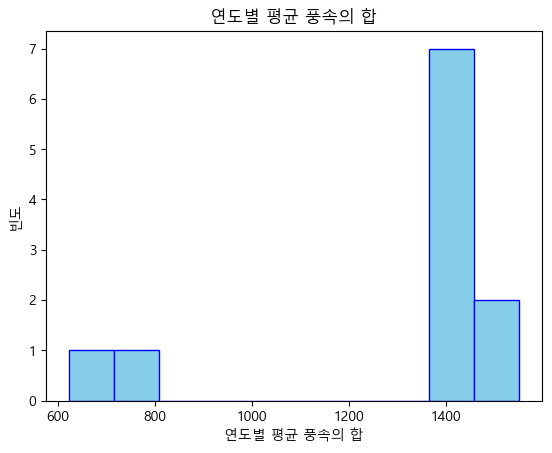

In [51]:
weather['일시']=pd.to_datetime(weather['일시'])
weather['연도']=weather['일시'].dt.year
sum_avg_wind=weather.groupby('연도')['평균 풍속'].sum()

plt.hist(sum_avg_wind,bins=10,color='skyblue',edgecolor='blue')
plt.title('연도별 평균 풍속의 합')
plt.xlabel("연도별 평균 풍속의 합")
plt.ylabel('빈도')
plt.show()

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [52]:
avg_temp_2015 = weather.loc[weather['연도']==2015,'평균 기온'].mean()
avg_temp_2016 = weather.loc[weather['연도']==2016,'평균 기온'].mean()

if avg_temp_2015 >avg_temp_2016:
    print('2015년의 평균기온의 평균이 더 덥다.')
elif avg_temp_2015<avg_temp_2016:
    print('2016년의 평균기온의 평균이 더 덥다.')
else:
    print('2015년 평균기온의 평균과 2016년 평균기온의 평균이 같다.')

2016년의 평균기온의 평균이 더 덥다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [53]:
avg_temp_month_sum = weather.groupby(weather['일시'].dt.month)['평균 기온'].sum()

coldest_month = avg_temp_month_sum.idxmin()
hottest_month = avg_temp_month_sum.idxmax()

print('평균 기온의 합이 가장 낮은 달',coldest_month,'월')
print('평균 기온의 합이 가장 높은 달',hottest_month,'월')

평균 기온의 합이 가장 낮은 달 1 월
평균 기온의 합이 가장 높은 달 8 월


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [54]:
mean_max_windspeed_year = weather.groupby(weather['일시'].dt.year)['최대 풍속'].mean()

max_windspeed=mean_max_windspeed_year.idxmax()
print(max_windspeed,'년')

2011 년
